In [1]:
%matplotlib inline

In [64]:
from matplotlib import pyplot as plt
import pandas
import src
import gensim
import os
import os.path
import csv

In [3]:
rankfiles = dict()
for dirpath, dirname, filenames in os.walk('runs'):
    for filename in filenames:
        if filename.endswith("-ranks.csv.gz"):
            _, num, _, name, version = dirpath.split('/')
            if name not in rankfiles:
                rankfiles[name] = {'changeset': {'feature_location': list(),
                                                 'triage': list()},
                                   'release': {'feature_location': list(),
                                               'triage': list()},
                                  }
                
            parts = filename.split('-')
            rankfiles[name][parts[0]][parts[1]].append(os.path.join(dirpath, filename))

In [38]:
df = pandas.DataFrame()
for name, source in rankfiles.items():
    for source, exps in source.items():
        for exp, filenames in exps.items():
            mrr = list()
            for each in filenames:
                data = pandas.read_csv(each)
                mrr.append(src.utils.calculate_mrr(list(data.groupby("id")["rank"].min())))
                
                if len(data[data["distance"] == 1.0]):
                    print(each)
        
            mrr = pandas.Series(mrr)       
            df = df.append(
              {'name': name, 
               'source': source,
               'experiment': exp,
               'std': mrr.std(),
               'max-min': mrr.max() - mrr.min(),
               'max': mrr.max(),
               'median': mrr.median(),
               'min': mrr.min(),
               'count': mrr.count(),
               'raw': mrr
              }, ignore_index=True)

In [39]:
df

,count,experiment,max,max-min,median,min,name,raw,source,std
0,25,feature_location,0.231256,0.075217,0.188347,0.156039,openjpa,0 0.188347 1 0.193732 2 0.189910 3...,release,0.017172
1,25,triage,1.000000,0.000000,1.000000,1.000000,openjpa,0 1 1 1 2 1 3 1 4 1 5 ...,release,0.000000
2,24,feature_location,0.223181,0.048271,0.199082,0.174910,openjpa,0 0.208936 1 0.200692 2 0.200252 3...,changeset,0.012182
3,25,triage,0.390310,0.083629,0.336455,0.306681,openjpa,0 0.312720 1 0.348163 2 0.384143 3...,changeset,0.025306
4,36,feature_location,0.433985,0.083861,0.379771,0.350124,zookeeper,0 0.370326 1 0.396219 2 0.384131 3...,release,0.016100
5,36,triage,1.000000,0.000000,1.000000,1.000000,zookeeper,0 1 1 1 2 1 3 1 4 1 5 ...,release,0.000000
6,36,feature_location,0.375445,0.062973,0.339496,0.312472,zookeeper,0 0.333789 1 0.337527 2 0.356320 3...,changeset,0.013831
7,36,triage,0.383960,0.043088,0.362727,0.340872,zookeeper,0 0.356769 1 0.369212 2 0.368331 3...,changeset,0.012134
8,23,feature_location,0.385316,0.105743,0.335448,0.279573,pig,0 0.335448 1 0.346491 2 0.279573 3...,release,0.024304
9,23,triage,1.000000,0.000000,1.000000,1.000000,pig,0 1 1 1 2 1 3 1 4 1 5 ...,release,0.000000


In [40]:
df.where((df.experiment == 'feature_location') & (df.source == 'release')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
20,74,feature_location,0.559250,0.086100,0.515748,0.473149,bookkeeper,0 0.559009 1 0.495146 2 0.517076 3...,release,0.021126
12,26,feature_location,0.318799,0.116797,0.260383,0.202002,mahout,0 0.309602 1 0.284767 2 0.318799 3...,release,0.031074
0,25,feature_location,0.231256,0.075217,0.188347,0.156039,openjpa,0 0.188347 1 0.193732 2 0.189910 3...,release,0.017172
8,23,feature_location,0.385316,0.105743,0.335448,0.279573,pig,0 0.335448 1 0.346491 2 0.279573 3...,release,0.024304
16,39,feature_location,0.448330,0.214335,0.323181,0.233995,tika,0 0.328147 1 0.301087 2 0.348143 3...,release,0.048770
4,36,feature_location,0.433985,0.083861,0.379771,0.350124,zookeeper,0 0.370326 1 0.396219 2 0.384131 3...,release,0.016100


In [41]:
df.where((df.experiment == 'feature_location') & (df.source == 'changeset')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
22,74,feature_location,0.530068,0.110469,0.470862,0.419599,bookkeeper,0 0.510601 1 0.473793 2 0.445700 3...,changeset,0.024162
14,26,feature_location,0.268804,0.159264,0.167732,0.109540,mahout,0 0.196163 1 0.118333 2 0.169213 3...,changeset,0.046034
2,24,feature_location,0.223181,0.048271,0.199082,0.174910,openjpa,0 0.208936 1 0.200692 2 0.200252 3...,changeset,0.012182
10,23,feature_location,0.174969,0.034159,0.155622,0.140811,pig,0 0.150589 1 0.146388 2 0.161106 3...,changeset,0.009874
18,39,feature_location,0.291675,0.139016,0.224566,0.152659,tika,0 0.263635 1 0.210845 2 0.231792 3...,changeset,0.031563
6,36,feature_location,0.375445,0.062973,0.339496,0.312472,zookeeper,0 0.333789 1 0.337527 2 0.356320 3...,changeset,0.013831


In [42]:
df.where((df.experiment == 'triage') & (df.source == 'changeset')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
23,74,triage,0.705386,0.081301,0.667683,0.624085,bookkeeper,0 0.681098 1 0.657317 2 0.661382 3...,changeset,0.018381
15,26,triage,0.350461,0.106209,0.285077,0.244252,mahout,0 0.304107 1 0.262345 2 0.291319 3...,changeset,0.028186
3,25,triage,0.390310,0.083629,0.336455,0.306681,openjpa,0 0.312720 1 0.348163 2 0.384143 3...,changeset,0.025306
11,23,triage,0.263908,0.132062,0.173847,0.131847,pig,0 0.192888 1 0.178871 2 0.131847 3...,changeset,0.029096
19,39,triage,0.490452,0.153045,0.398551,0.337407,tika,0 0.396414 1 0.358814 2 0.490452 3...,changeset,0.033936
7,36,triage,0.383960,0.043088,0.362727,0.340872,zookeeper,0 0.356769 1 0.369212 2 0.368331 3...,changeset,0.012134


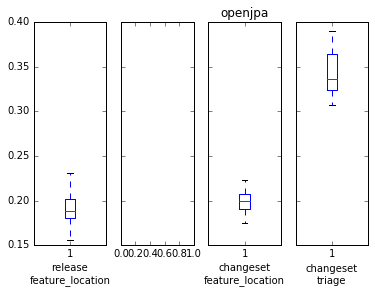

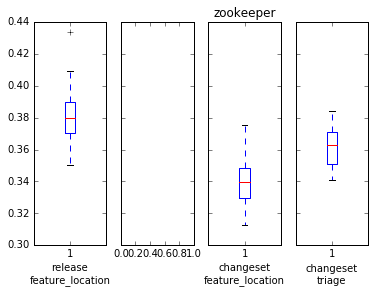

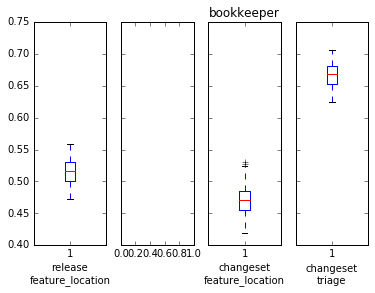

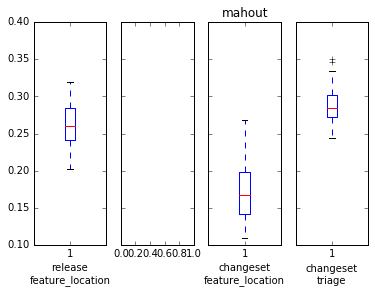

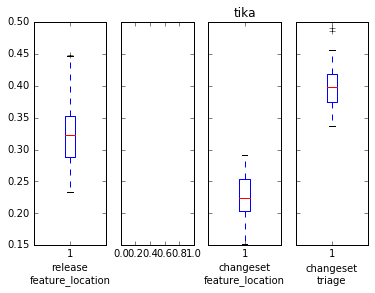

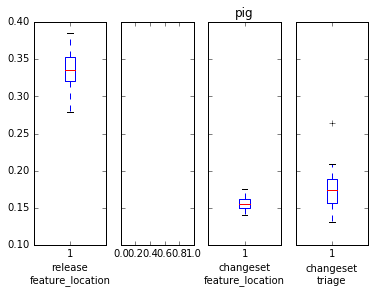

In [100]:
for plotname, indices in df.groupby(["name"]).groups.items():
    fig, axarr = plt.subplots(1, 4, sharey=True)
    axarr[2].set_title(plotname)
    for s, each in enumerate(indices):
        exp = df.ix[each]
        if (exp["min"] == 1.0):
            continue
        axarr[s].boxplot(exp.raw)
        axarr[s].set_xlabel(exp.source + "\n" + exp.experiment)
    plt.show()